In [7]:
import csv
from collections import defaultdict
from typing import TypedDict
import json

class MonthDataPoint(TypedDict):
    month: str 
    destination: str
    nb_conge: int
    year: int


destination_month_destination = []

total_by_month = defaultdict(int)

MONTHS = ["01 Janvier","02 Février"," 03 Mars","04 Avril","05 Mai","06 Juin","07 Juillet","08 Août","09 Septembre","10 Octobre","11 Novembre","12 Décembre"]
year_file = [(1790, "./data/PFISTER_PORTS_NAVIRES_TAB_91_p_342_1790.csv"), (1781, "./data/PFISTER_PORTS_NAVIRES_TAB_90_p_341_1781.csv")]
for (year, file) in year_file:
    with open(file, "r") as data:
        for row in csv.DictReader(data):
            for month in MONTHS:
                if month in row and row[month] != '':
                    data_point:MonthDataPoint = MonthDataPoint(
                        month= month,
                        destination= row['destination'],
                        nb_conge= int(row[month]),
                        year= year
                    )
                    destination_month_destination.append(data_point)
                    total_by_month[month] += int(row[month])

#print(json.dumps(destination_month_destination))

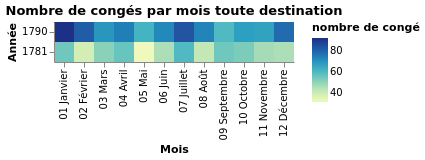

In [8]:
from IPython.display import display
import pandas as pd

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)


VegaLite({
  "title": "Nombre de congés par mois toute destination",
  "data": {"values": destination_month_destination},
  "transform": [
    {
      "aggregate": [{
       "op": "sum",
       "field": "nb_conge",
       "as": "nb_conge_all_dest"
      }],
      "groupby": ["year", "month"]
    }
  ],
  "mark": {"type":"rect", "tooltip": {"content": "data"}},
  "encoding": {
    "x": {
      "field": "month",
      "title": "Mois",
      "type": "ordinal",
      
      "sort": "asc"
    },
    "y": {
      "title": "Année",
      "field":"year",
      "type": "ordinal",
      "sort": { "field":"year", "order": "descending"}
    },
    "color": {
      "field": "nb_conge_all_dest",
      "title": "nombre de congé",
      "type": "quantitative"
    }
  },
  "config": {
    "view": {
      "stroke": "transparent"
    }
  }
})


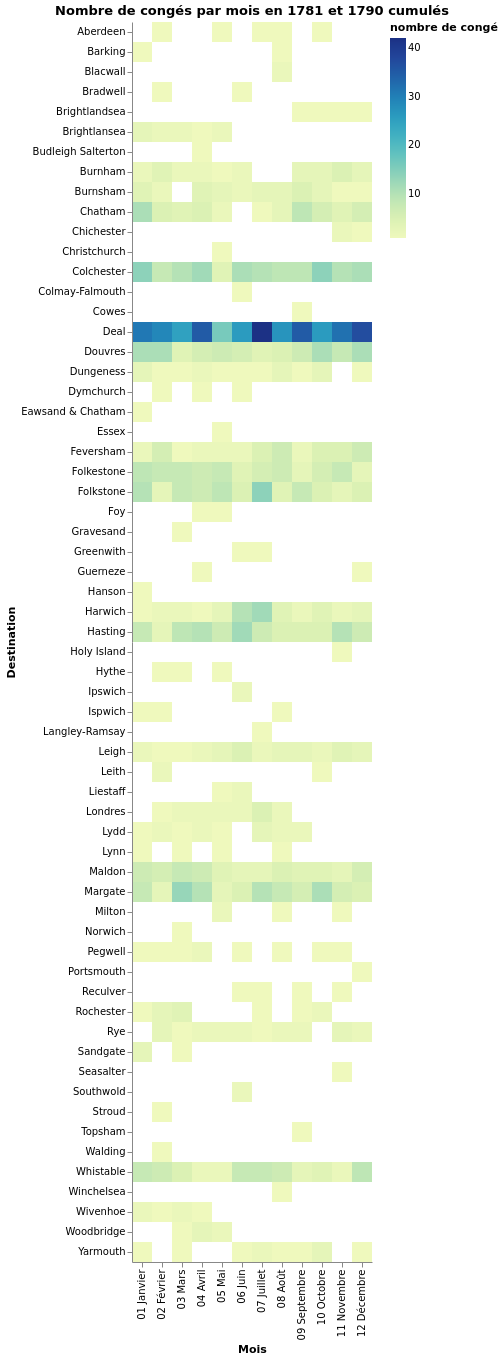

In [9]:
VegaLite({
  "title": "Nombre de congés par mois en 1781 et 1790 cumulés",
  "data": { "values": destination_month_destination},


  "transform": [
    {
      "aggregate": [{
       "op": "sum",
       "field": "nb_conge",
       "as": "nb_conge_sum"
      }],
      "groupby": ["destination", "month"]
    }
  ],
  "mark": {"type":"rect", "tooltip": {"content": "data"}},
  "encoding": {
    "x": {
      "field": "month",
      "title": "Mois",
      "type": "ordinal",

      "sort": "asc"
    },
    "y": {
      "title": "Destination",
      "field":"destination",
      "type": "ordinal"
      
    },
    "color": {
      "field": "nb_conge_sum",
      "title": "nombre de congé",
      "type": "quantitative"
    }
  },
  "config": {
    "view": {
      "stroke": "transparent"
    }
  }
})

